<a href="https://colab.research.google.com/github/nosbyelk/hello-world/blob/master/Previs%C3%A3o_de_pre%C3%A7os_de_apartamentos_MRLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Importação dos pacotes e do conjunto de dados*


In [ ]:
import pandas as pd
import numpy as np
import rfpimp
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

df = pd.read_csv('Aparts.csv')

In [ ]:
pip install rfpimp


# **Variáveis e valores**

In [ ]:
df

,Apartamento,Valor,Area,DistMar,Andar,Idade,Estado
0,1,390000,62,1200,1,25,3
1,2,535000,65,400,6,5,5
2,3,1300000,160,5,12,10,4
3,4,680000,76,50,8,2,5
4,5,460000,65,600,2,10,3
5,6,720000,86,100,5,2,5
6,7,570000,66,300,2,15,3
7,8,605000,70,300,6,14,3
8,9,1100000,146,5,4,10,4
9,10,526000,70,400,6,8,4


# **Idade do imóvel (em anos): Plotagem de ajuste de linha** 





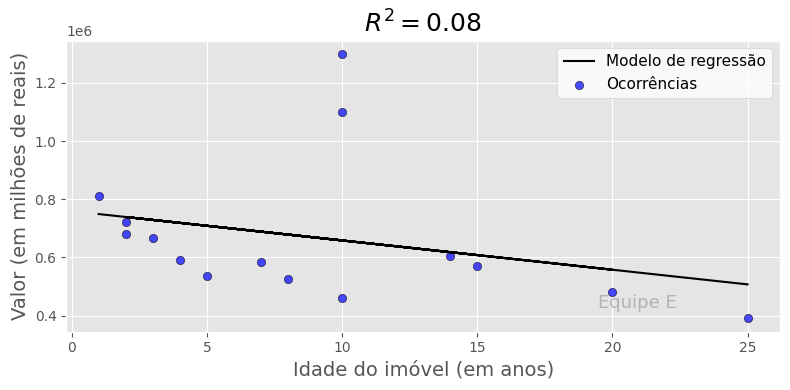

In [ ]:
import sklearn
from sklearn import linear_model
X = df['Idade'].values.reshape(-1,1)
y = df['Valor'].values

################################################ Treino #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Avaliação ############################################

r2 = model.score(X, y)

############################################## Plotagem ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Modelo de regressão')
ax.scatter(X, y, edgecolor='k', facecolor='blue', alpha=0.7, label='Ocorrências')
ax.set_ylabel('Valor (em milhões de reais)', fontsize=14)
ax.set_xlabel('Idade do imóvel (em anos)', fontsize=14)
ax.text(0.8, 0.1, 'Equipe E', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [ ]:
df2 = df.drop([2, 8])
df2

,Apartamento,Valor,Area,DistMar,Andar,Idade,Estado
0,1,390000,62,1200,1,25,3
1,2,535000,65,400,6,5,5
3,4,680000,76,50,8,2,5
4,5,460000,65,600,2,10,3
5,6,720000,86,100,5,2,5
6,7,570000,66,300,2,15,3
7,8,605000,70,300,6,14,3
9,10,526000,70,400,6,8,4
10,11,480000,65,500,3,20,2
11,12,585000,65,400,4,7,2


# **Gráfico tridimensional com duas variáveis explicativas: Plotagem de ajuste de linha**

Intercepto: 
 786532.9378602675
Coeficientes: 
 [15614.78183381  -820.50512548]


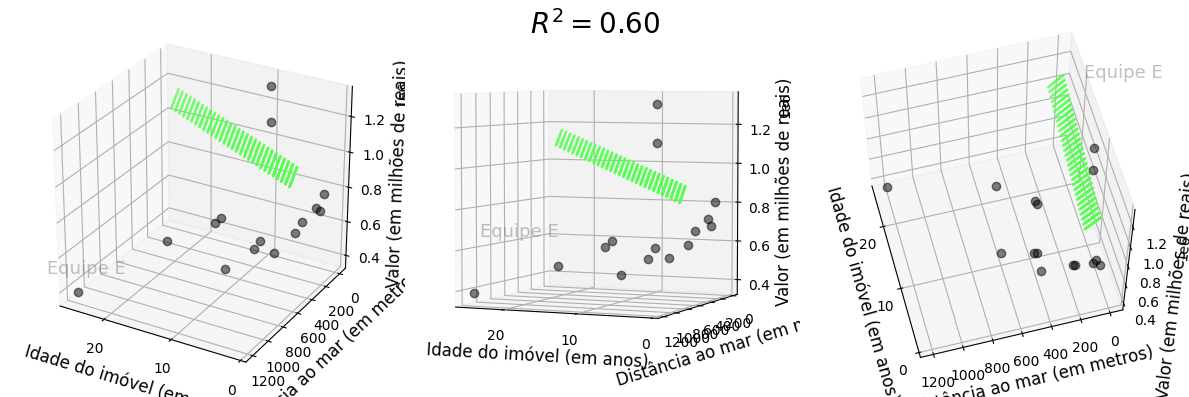

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Preparação dos dados #########################################

X = df[['Idade', 'DistMar']].values.reshape(-1,2)
Y = df['Valor']

######################## Pontos do modelo para visualização ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # intervalo de valores de Idade
y_pred = np.linspace(0, 100, 30)  # intervalo de valores de DistMar
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Treino #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Avaliação ############################################

r2 = model.score(X, Y)

############################################## Plotagem ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=1, edgecolor='#55ff50')
    ax.set_xlabel('Idade do imóvel (em anos)', fontsize=12)
    ax.set_ylabel('Distância ao mar (em metros)', fontsize=12)
    ax.set_zlabel('Valor (em milhões de reais)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'Equipe E', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'Equipe E', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'Equipe E', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

print('Intercepto: \n', ols.intercept_)
print('Coeficientes: \n', ols.coef_)

# *Salvando fotos para gif*

In [ ]:
!zip -r ./images.zip ./gif/


  adding: gif/ (stored 0%)
  adding: gif/gif_image249.png (deflated 6%)
  adding: gif/gif_image167.png (deflated 6%)
  adding: gif/gif_image339.png (deflated 7%)
  adding: gif/gif_image252.png (deflated 6%)
  adding: gif/gif_image116.png (deflated 6%)
  adding: gif/gif_image308.png (deflated 7%)
  adding: gif/gif_image279.png (deflated 6%)
  adding: gif/gif_image76.png (deflated 6%)
  adding: gif/gif_image274.png (deflated 6%)
  adding: gif/gif_image45.png (deflated 7%)
  adding: gif/gif_image266.png (deflated 6%)
  adding: gif/gif_image224.png (deflated 7%)
  adding: gif/gif_image41.png (deflated 7%)
  adding: gif/gif_image359.png (deflated 6%)
  adding: gif/gif_image78.png (deflated 6%)
  adding: gif/gif_image186.png (deflated 6%)
  adding: gif/gif_image64.png (deflated 6%)
  adding: gif/gif_image65.png (deflated 6%)
  adding: gif/gif_image315.png (deflated 7%)
  adding: gif/gif_image306.png (deflated 6%)
  adding: gif/gif_image56.png (deflated 6%)
  adding: gif/gif_image156.png (def

# **Testando duas variáveis explicativas sem outliers**

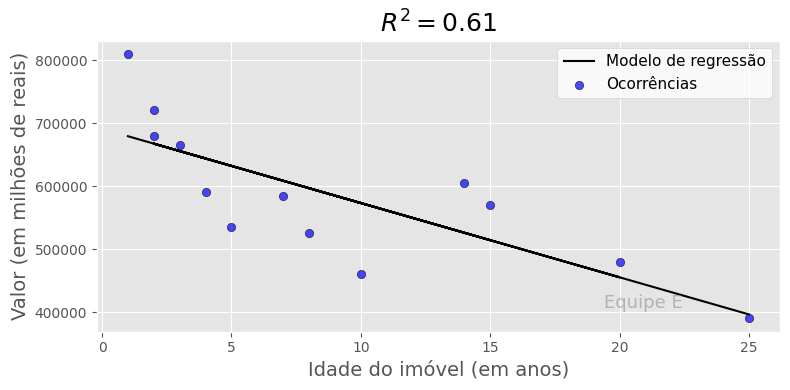

In [ ]:
import sklearn
from sklearn import linear_model
X = df2['Idade'].values.reshape(-1,1)
y = df2['Valor'].values

################################################ Treino #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Avaliação ############################################

r2 = model.score(X, y)

############################################## Plotagem ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Modelo de regressão')
ax.scatter(X, y, edgecolor='k', facecolor='blue', alpha=0.7, label='Ocorrências')
ax.set_ylabel('Valor (em milhões de reais)', fontsize=14)
ax.set_xlabel('Idade do imóvel (em anos)', fontsize=14)
ax.text(0.8, 0.1, 'Equipe E', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

FileNotFoundError: ignored

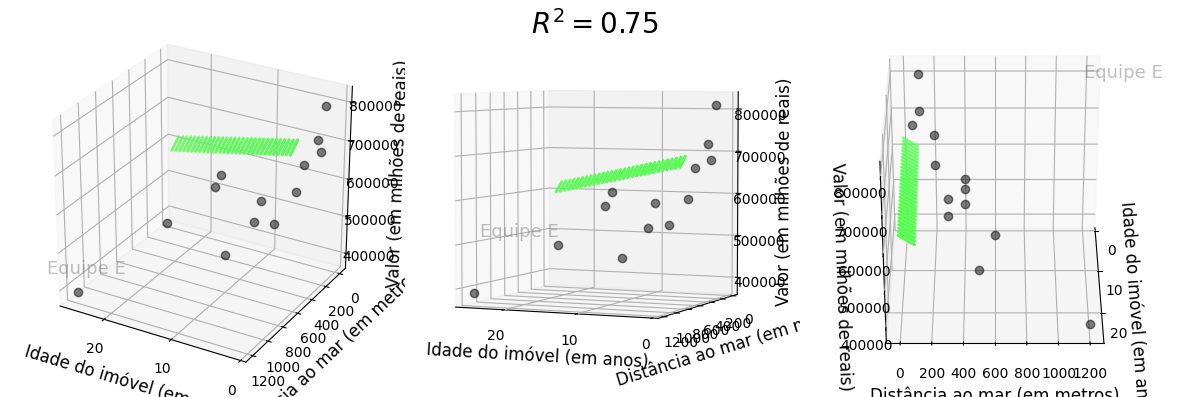

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Preparação dos dados #########################################

X = df2[['Idade', 'DistMar']].values.reshape(-1,2)
Y = df2['Valor']

######################## Pontos do modelo para visualização ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # intervalo de valores de Idade
y_pred = np.linspace(0, 100, 30)  # intervalo de valores de DistMar
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Treino #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Avaliação ############################################

r2 = model.score(X, Y)

############################################## Plotagem ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=1, edgecolor='#55ff50')
    ax.set_xlabel('Idade do imóvel (em anos)', fontsize=12)
    ax.set_ylabel('Distância ao mar (em metros)', fontsize=12)
    ax.set_zlabel('Valor (em milhões de reais)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'Equipe E', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'Equipe E', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'Equipe E', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('gif/gif_image%d.png' % ii)